# I. Import Required Libraries

In [8]:
# python librairies installation
# !pip install split-folders matplotlib opencv-python spicy

In [1]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
# import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# II. Data Preprocessing

1. Visualize images of all the classes.
2. Split data into train, test and split. (The dataset we have has already been split so, we will be skipping this step)
3. We have to use data augmentation. For that, we use Keras Data Generators.

## Visualize Images
- We will be using the **load_img()** function to display images (train).

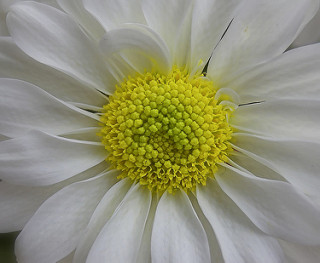

In [2]:
# Daisy
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/daisy/100080576_f52e8ee070_n.jpg")
img

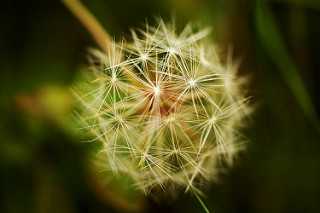

In [3]:
# Dandelion
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/dandelion/10043234166_e6dd915111_n.jpg")
img

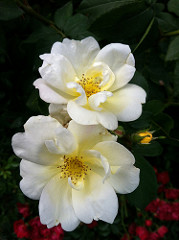

In [4]:
# Roses
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/roses/10090824183_d02c613f10_m.jpg")
img

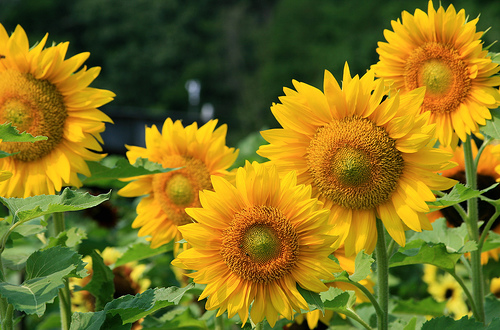

In [5]:
# Sunflowers
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/sunflowers/1008566138_6927679c8a.jpg")
img

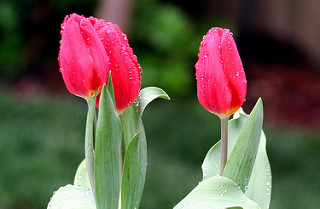

In [6]:
# Tulips
img = tf.keras.preprocessing.image.load_img(r"D:\Downloads\archive\flowers\flowers\flower_photos/train/tulips/100930342_92e8746431_n.jpg")
img

## Data Augmentation
- Create Keras Data Generators

In [7]:
aug = ImageDataGenerator()

In [8]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [9]:
# training data
train_generator = aug.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 3540 images belonging to 5 classes.


In [10]:
# validation data
valid_generator = aug.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/validation/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 80 images belonging to 5 classes.


In [11]:
# test data
test_generator = aug.flow_from_directory( 
    directory=r"D:\Downloads\archive\flowers\flowers\flower_photos/test/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 50 images belonging to 5 classes.


# III. Build the Model
- Build the model using ResNet50.

In [12]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [39]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
x = layers.Dense(32, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
x = layers.Dense(16, activation='relu')(x) 
x = layers.Dropout(0.26)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

# IV. Train the Model
- Adam optimizer is used to train the model over 10 epochs.
- The loss is calculated with the sparse_categorical_crossentropy function.

In [40]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [41]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
111/111 [==============================] - 134s 1s/step - loss: 1.5105 - accuracy: 0.3299 - val_loss: 0.9935 - val_accuracy: 0.6375
Epoch 2/10
111/111 [==============================] - 131s 1s/step - loss: 1.0713 - accuracy: 0.5819 - val_loss: 0.6606 - val_accuracy: 0.8000
Epoch 3/10
111/111 [==============================] - 131s 1s/step - loss: 0.7761 - accuracy: 0.7466 - val_loss: 0.4984 - val_accuracy: 0.8250
Epoch 4/10
111/111 [==============================] - 132s 1s/step - loss: 0.6226 - accuracy: 0.8031 - val_loss: 0.3548 - val_accuracy: 0.8750
Epoch 5/10
111/111 [==============================] - 132s 1s/step - loss: 0.5389 - accuracy: 0.8325 - val_loss: 0.4298 - val_accuracy: 0.8625
Epoch 6/10
111/111 [==============================] - 132s 1s/step - loss: 0.4997 - accuracy: 0.8506 - val_loss: 0.4293 - val_accuracy: 0.8750
Epoch 7/10
111/111 [==============================] - 133s 1s/step - loss: 0.4075 - accuracy: 0.8757 - val_loss: 0.3632 - val_accuracy: 0.8750

### Displaying Loss Curves

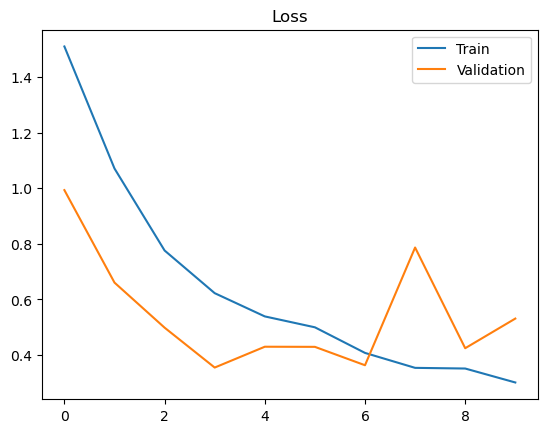

In [42]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

### Displaying Accuracy curves

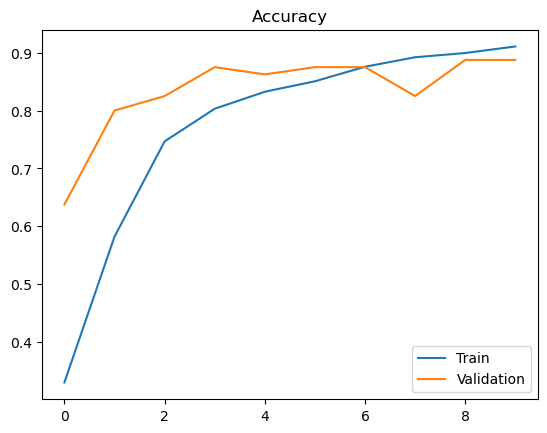

In [43]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

# V. Evaluate the Model
- The model is evaluated using **test_generator** initiated above.

In [44]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 2s 636ms/step - loss: 0.5964 - accuracy: 0.8600
The test loss is:  0.5963686108589172
The best accuracy is:  86.00000143051147


# VI. Save and Export the Model
- The model is saved using **pickle**.

In [45]:
# Save model using pickle
import pickle
file = open("final.pkl", 'wb')
pickle.dump(model, file)
file.close()

# Trying out the saved Model

In [46]:
import pickle
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

with open('final.pkl', 'rb') as file:
    model1 = pickle.load(file)

In [47]:
img = tf.keras.preprocessing.image.load_img('OIP (1).jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
print(img_array.shape)
predictions = model1.predict(img_array)
print(predictions)
class_id = np.argmax(predictions, axis = 1)
print(class_id)
class_names = ['daisy','dandelion','roses','sunflowers','tulips']
class_names[class_id.item()]

(1, 224, 224, 3)
1/1 [==============================] - 1s 922ms/step
[[3.6123158e-08 9.9999988e-01 6.7787476e-10 2.8308853e-09 3.5518923e-08]]
[1]


'dandelion'